In [238]:
print('hello')

hello


In [239]:
import pandas as pd

matches = pd.read_csv('match_data.csv')

In [240]:
matches.head()


,match_id,game_time,placement,level,gold_left,augments,traits,units
0,NA1_5257919321,2025-04-02 05:58:21.042000+00:00,2,10,6,[],"['TFT13_Bruiser-1', 'TFT13_FormSwapper-3', 'TF...","['TFT13_Draven (2★)', 'TFT13_Red (1★)', 'TFT13..."
1,NA1_5257906147,2025-04-02 05:32:00.650000+00:00,1,10,1,[],"['TFT13_Ambassador-1', 'TFT13_Bruiser-1', 'TFT...","['TFT13_Draven (2★)', 'TFT13_Rell (2★)', 'TFT1..."
2,NA1_5257797878,2025-04-02 02:53:53.027000+00:00,1,10,14,[],"['TFT13_Ambassador-2', 'TFT13_Cabal-1', 'TFT13...","['TFT13_Vladimir (2★)', 'TFT13_Tristana (2★)',..."
3,NA1_5257772276,2025-04-02 02:13:51.269000+00:00,5,8,53,[],"['TFT13_Ambassador-1', 'TFT13_FormSwapper-3', ...","['TFT13_Draven (2★)', 'TFT13_Rell (2★)', 'tft1..."
4,NA1_5257476171,2025-04-01 09:18:39.509000+00:00,1,10,2,[],"['TFT13_BloodHunter-1', 'TFT13_Bruiser-1', 'TF...","['TFT13_Draven (2★)', 'TFT13_Red (1★)', 'TFT13..."


In [241]:
matches.count()

match_id     576
game_time    576
placement    576
level        576
gold_left    576
augments     576
traits       576
units        576
dtype: int64

In [242]:
matches.shape

(576, 8)

In [243]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   match_id   576 non-null    object
 1   game_time  576 non-null    object
 2   placement  576 non-null    int64 
 3   level      576 non-null    int64 
 4   gold_left  576 non-null    int64 
 5   augments   576 non-null    object
 6   traits     576 non-null    object
 7   units      576 non-null    object
dtypes: int64(3), object(5)
memory usage: 36.1+ KB


In [244]:
matches.drop(['match_id', 'game_time', 'augments'], axis=1, inplace=True)

In [245]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   placement  576 non-null    int64 
 1   level      576 non-null    int64 
 2   gold_left  576 non-null    int64 
 3   traits     576 non-null    object
 4   units      576 non-null    object
dtypes: int64(3), object(2)
memory usage: 22.6+ KB


In [246]:
matches.duplicated().sum()

np.int64(0)

In [247]:
matches.isnull().sum()

placement    0
level        0
gold_left    0
traits       0
units        0
dtype: int64

In [248]:
matches.describe()

,placement,level,gold_left
count,576.000000,576.000000,576.00000
mean,3.902778,8.604167,10.87500
std,2.225760,1.009305,19.30348
min,1.000000,5.000000,0.00000
25%,2.000000,8.000000,1.00000
50%,4.000000,9.000000,2.50000
75%,6.000000,9.000000,11.00000
max,8.000000,10.000000,152.00000


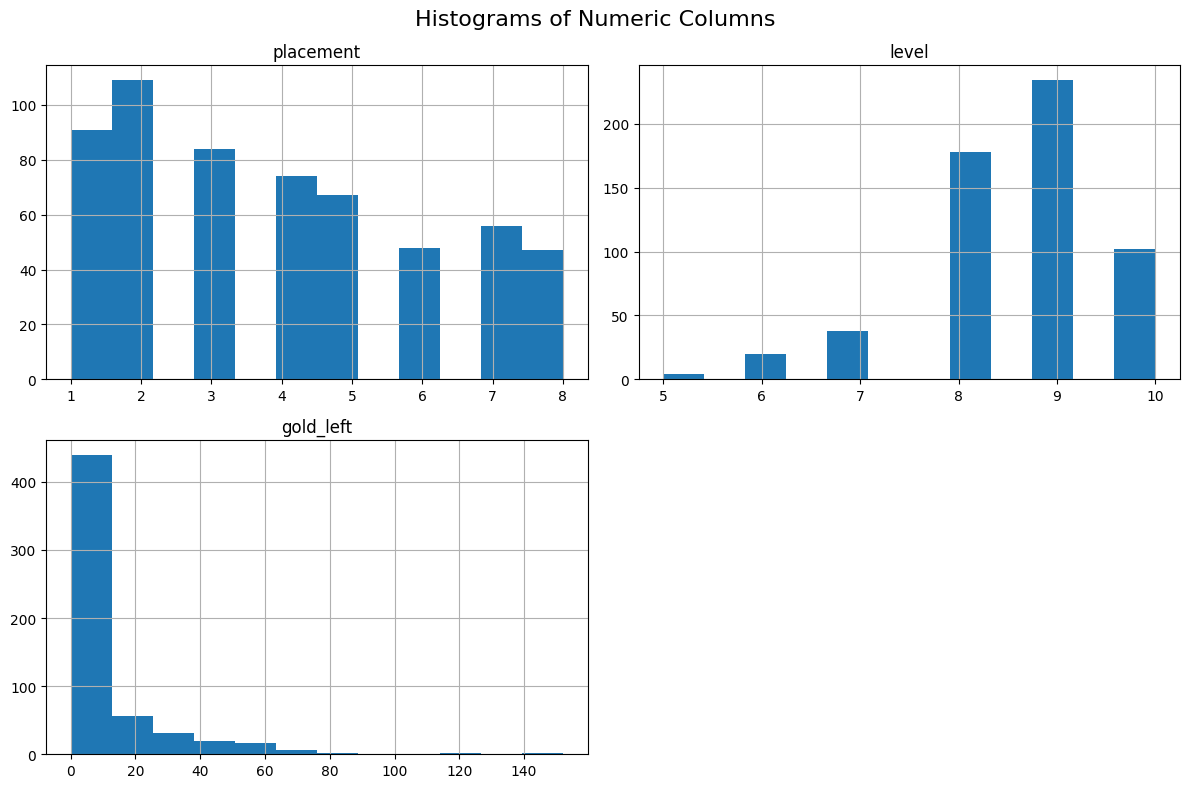

In [249]:
import matplotlib.pyplot as plt

numeric_cols = ['placement', 'level', 'gold_left']
matches[numeric_cols].hist(bins=12, figsize=(12, 8))
plt.suptitle('Histograms of Numeric Columns', fontsize=16)
plt.tight_layout()
plt.show()

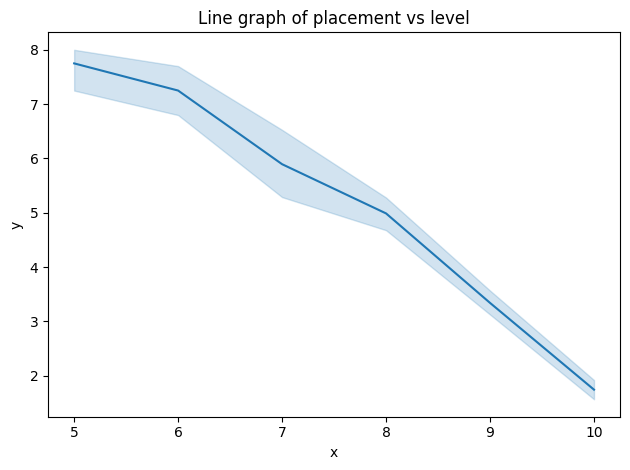

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

# df is your pandas DataFrame, replace 'x' and 'y' with your column names
sns.lineplot(data=matches, x='level', y='placement')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line graph of placement vs level')
plt.tight_layout()
plt.show()


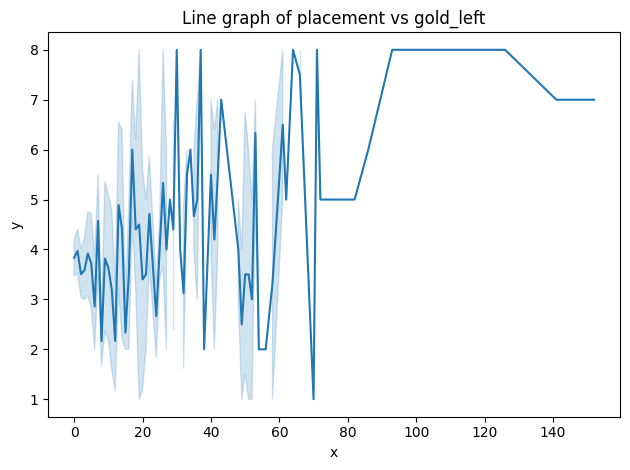

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt

# df is your pandas DataFrame, replace 'x' and 'y' with your column names
sns.lineplot(data=matches, x='gold_left', y='placement')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line graph of placement vs gold_left')
plt.tight_layout()
plt.show()


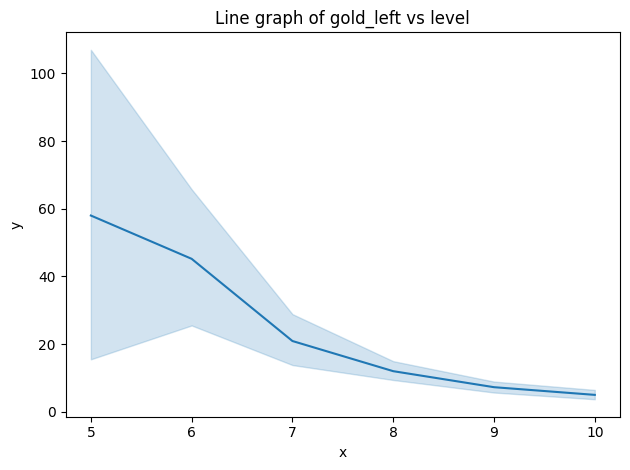

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

# df is your pandas DataFrame, replace 'x' and 'y' with your column names
sns.lineplot(data=matches, x='level', y='gold_left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line graph of gold_left vs level')
plt.tight_layout()
plt.show()


In [253]:
import ast                   # safe literal parser
import pandas as pd

# assume df already exists and the column is called "traits"
matches["traits"] = matches["traits"].apply(
    lambda s: ast.literal_eval(s) if isinstance(s, str) else s
)

In [254]:
matches.head()

,placement,level,gold_left,traits,units
0,2,10,6,"[TFT13_Bruiser-1, TFT13_FormSwapper-3, TFT13_H...","['TFT13_Draven (2★)', 'TFT13_Red (1★)', 'TFT13..."
1,1,10,1,"[TFT13_Ambassador-1, TFT13_Bruiser-1, TFT13_Fo...","['TFT13_Draven (2★)', 'TFT13_Rell (2★)', 'TFT1..."
2,1,10,14,"[TFT13_Ambassador-2, TFT13_Cabal-1, TFT13_Form...","['TFT13_Vladimir (2★)', 'TFT13_Tristana (2★)',..."
3,5,8,53,"[TFT13_Ambassador-1, TFT13_FormSwapper-3, TFT1...","['TFT13_Draven (2★)', 'TFT13_Rell (2★)', 'tft1..."
4,1,10,2,"[TFT13_BloodHunter-1, TFT13_Bruiser-1, TFT13_F...","['TFT13_Draven (2★)', 'TFT13_Red (1★)', 'TFT13..."


In [255]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   placement  576 non-null    int64 
 1   level      576 non-null    int64 
 2   gold_left  576 non-null    int64 
 3   traits     576 non-null    object
 4   units      576 non-null    object
dtypes: int64(3), object(2)
memory usage: 22.6+ KB


In [256]:
matches["units"] = matches["units"].apply(
    lambda s: ast.literal_eval(s) if isinstance(s, str) else s
)

In [257]:
matches.head()

,placement,level,gold_left,traits,units
0,2,10,6,"[TFT13_Bruiser-1, TFT13_FormSwapper-3, TFT13_H...","[TFT13_Draven (2★), TFT13_Red (1★), TFT13_Urgo..."
1,1,10,1,"[TFT13_Ambassador-1, TFT13_Bruiser-1, TFT13_Fo...","[TFT13_Draven (2★), TFT13_Rell (2★), TFT13_Set..."
2,1,10,14,"[TFT13_Ambassador-2, TFT13_Cabal-1, TFT13_Form...","[TFT13_Vladimir (2★), TFT13_Tristana (2★), tft..."
3,5,8,53,"[TFT13_Ambassador-1, TFT13_FormSwapper-3, TFT1...","[TFT13_Draven (2★), TFT13_Rell (2★), tft13_swa..."
4,1,10,2,"[TFT13_BloodHunter-1, TFT13_Bruiser-1, TFT13_F...","[TFT13_Draven (2★), TFT13_Red (1★), TFT13_Urgo..."


In [258]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb      = MultiLabelBinarizer()
one_hot  = mlb.fit_transform(matches["traits"])

traits_hot = pd.DataFrame(
    one_hot,
    columns=mlb.classes_,        # each *trait-tier* becomes its own column
    index=matches.index
)

matches_onehot = pd.concat([matches.drop(columns=["traits"]), traits_hot], axis=1)

In [259]:
mlb      = MultiLabelBinarizer()
one_hot  = mlb.fit_transform(matches["units"])

traits_hot = pd.DataFrame(
    one_hot,
    columns=mlb.classes_,        # each *trait-tier* becomes its own column
    index=matches.index
)

matches_onehot = pd.concat([matches_onehot.drop(columns=["units"]), traits_hot], axis=1)

In [260]:
matches_onehot.head()

,placement,level,gold_left,TFT13_Academy-1,TFT13_Academy-2,TFT13_Academy-3,TFT13_Academy-4,TFT13_Ambassador-1,TFT13_Ambassador-2,TFT13_Ambusher-1,...,TFT4b_Kindred (2★),TFT4b_Morgana (2★),TFT4b_Zed (1★),tft13_elise (1★),tft13_elise (2★),tft13_jinx (1★),tft13_jinx (2★),tft13_swain (1★),tft13_swain (2★),tft13_swain (3★)
0,2,10,6,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,10,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,10,14,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,5,8,53,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,10,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [261]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   placement  576 non-null    int64 
 1   level      576 non-null    int64 
 2   gold_left  576 non-null    int64 
 3   traits     576 non-null    object
 4   units      576 non-null    object
dtypes: int64(3), object(2)
memory usage: 22.6+ KB


In [262]:
sparsity = (matches == 0).sum(axis=0) / len(matches)
print("Average % of 0s per feature:", sparsity.mean())

Average % of 0s per feature: 0.03576388888888889


In [263]:
# part 2
# uncapped split
from sklearn.model_selection import train_test_split

y = matches_onehot['placement']
X = matches_onehot.drop('placement', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)



In [264]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# your features
X_train_np = X_train.values.astype(np.float32)
X_test_np  = X_test.values.astype(np.float32)

# CNNs need 3D input: (samples, steps, channels)
# For 1D CNN: we treat each feature as a step, and use 1 channel
X_train_np = np.expand_dims(X_train_np, axis=-1)   # shape: (n_samples, n_features, 1)
X_test_np  = np.expand_dims(X_test_np, axis=-1)

# labels (convert placement 1–8 to 0–7 for classification)
y_train_np = y_train.values.astype(np.int32) - 1
y_test_np  = y_test.values.astype(np.int32) - 1

# One-hot encode labels (optional if using sparse categorical loss)
num_classes = len(np.unique(y_train_np))
y_train_cat = tf.keras.utils.to_categorical(y_train_np, num_classes)
y_test_cat  = tf.keras.utils.to_categorical(y_test_np, num_classes)


In [265]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Rescaling

model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_np.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # use softmax for multi-class classification
])

c:\Users\Abel\Desktop\project4\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [266]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',          # or 'sparse_categorical_crossentropy' if not one-hot
    metrics=['accuracy']
)

history = model.fit(
    X_train_np, y_train_cat,                  # or y_train_np if using sparse loss
    epochs=40,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.1467 - loss: 2.0940 - val_accuracy: 0.1728 - val_loss: 2.0121
Epoch 2/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2535 - loss: 1.9847 - val_accuracy: 0.1235 - val_loss: 1.9938
Epoch 3/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2206 - loss: 1.9458 - val_accuracy: 0.1481 - val_loss: 2.0033
Epoch 4/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2466 - loss: 1.8707 - val_accuracy: 0.2346 - val_loss: 1.9527
Epoch 5/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3172 - loss: 1.8028 - val_accuracy: 0.2099 - val_loss: 1.9861
Epoch 6/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3527 - loss: 1.7119 - val_accuracy: 0.2346 - val_loss: 2.0042
Epoch 7/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3620 - loss: 1.7107 - val_accuracy: 0.2469 - val_loss: 2.0205
Epoch 8/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3795 - loss: 1.6673 - val_accuracy: 0.2346 - v

In [267]:
loss, acc = model.evaluate(X_test_np, y_test_cat)
print(f"Test accuracy: {acc:.2%}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1687 - loss: 3.6696 
Test accuracy: 17.34%


In [268]:
# ada boost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_stump = DecisionTreeClassifier(max_depth=1)

param_grid = {
   'learning_rate': [0.1, 0.5, 1.0],
   'n_estimators': [50, 100, 200]
}

abc = AdaBoostClassifier(estimator=decision_tree_stump, random_state=42)
grid_search = GridSearchCV(abc, param_grid, cv=3, n_jobs=8)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             n_jobs=8,
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]})

In [269]:
from sklearn.metrics import classification_report
model = grid_search.best_estimator_
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")


Performance on TEST
*******************
              precision    recall  f1-score   support

           1       0.52      0.52      0.52        27
           2       0.22      0.48      0.30        33
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00        22
           5       0.16      0.40      0.23        20
           6       0.00      0.00      0.00        15
           7       0.33      0.24      0.28        17
           8       0.38      0.21      0.27        14

    accuracy                           0.26       173
   macro avg       0.20      0.23      0.20       173
weighted avg       0.20      0.26      0.21       173

Performance on TRAIN
********************
              precision    recall  f1-score   support

           1       0.52      0.61      0.56        64
           2       0.28      0.59      0.38        76
           3       0.00      0.00      0.00        59
           4       0.50      0.02      0.04       

c:\Users\Abel\Desktop\project4\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Abel\Desktop\project4\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Abel\Desktop\project4\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\U

In [270]:
matches.head()

,placement,level,gold_left,traits,units
0,2,10,6,"[TFT13_Bruiser-1, TFT13_FormSwapper-3, TFT13_H...","[TFT13_Draven (2★), TFT13_Red (1★), TFT13_Urgo..."
1,1,10,1,"[TFT13_Ambassador-1, TFT13_Bruiser-1, TFT13_Fo...","[TFT13_Draven (2★), TFT13_Rell (2★), TFT13_Set..."
2,1,10,14,"[TFT13_Ambassador-2, TFT13_Cabal-1, TFT13_Form...","[TFT13_Vladimir (2★), TFT13_Tristana (2★), tft..."
3,5,8,53,"[TFT13_Ambassador-1, TFT13_FormSwapper-3, TFT1...","[TFT13_Draven (2★), TFT13_Rell (2★), tft13_swa..."
4,1,10,2,"[TFT13_BloodHunter-1, TFT13_Bruiser-1, TFT13_F...","[TFT13_Draven (2★), TFT13_Red (1★), TFT13_Urgo..."


In [272]:
max_units = matches["units"].apply(len).max()
print("Max units in any match:", max_units)

Max units in any match: 14


In [282]:
unit_traits = {
    'TFT13_Amumu': ['Hextech', 'Watcher'],
    'TFT13_Darius': ['Warband', 'Watcher'],
    'TFT13_Draven': ['Warband', 'Pugilist'],
    'TFT13_Irelia': ['Rebel', 'Titan'],
    'TFT13_Lux': ['Academy', 'Sorcerer'],
    'TFT13_Shooter': ['Squad', 'Sniper'],
    'TFT13_Morgana': ['Cabal', 'Invoker'],
    'TFT13_Blue': ['Family', 'Scrap', 'Ambusher'],
    'TFT13_Singed': ['Crime', 'Titan'],
    'TFT13_Fish': ['Squad', 'Bruiser'],
    'TFT13_Trundle': ['Scrap', 'Bruiser'],
    'TFT13_Vex': ['Rebel', 'Invoker'],
    'TFT13_Red': ['Family', 'Pugilist'],
    'TFT13_Zyra': ['Experiment', 'Sorcerer'],
    'TFT13_Akali': ['Rebel', 'Challenger'],
    'TFT13_Camille': ['Squad', 'Ambusher'],
    'TFT13_Leona': ['Academy', 'Titan'],
    'TFT13_Nocturne': ['Hextech', 'Challenger'],
    'TFT13_Rell': ['Warband', 'Titan', 'Invoker'],
    'TFT13_RenataGlasc': ['Crime', 'Invoker'],
    'TFT13_Sett': ['Rebel', 'Bruiser', "Pugilist"],
    'TFT13_Tristana': ['Ambassador', 'Martialist'],
    'TFT13_Urgot': ['Experiment', 'Pugilist', 'Martialist'],
    'TFT13_Prime': ['Family', 'Watcher'],
    'TFT13_Vladimir': ['Cabal', 'Watcher', 'Sorcerer'],
    'TFT13_Zeri': ['Hoverboard', 'Sniper'],
    'TFT13_Ziggs': ['Scrap', 'Infused'],
    'TFT13_Blitzcrank': ['Hextech', 'Infused'],
    'TFT13_Cassiopeia': ['Cabal', 'Infused'],
    'TFT13_Ezreal': ['Academy', 'Rebel', 'Martialist'],
    'TFT13_Gangplank': ['Scrap', 'Form Swapper', 'Pugilist'],
    'TFT13_KogMaw': ['Hextech', 'Sniper'],
    'TFT13_Beardy': ['Squad', 'Titan'],
    'TFT13_Nami': ['Ambassador', 'Sorcerer'],
    'TFT13_NunuWillump': ['Experiment', 'Bruiser', 'Invoker'],
    'TFT13_Chainsaw': ['Crime', 'Bruiser'],
    'TFT13_FlyGuy': ['Hoverboard', 'Watcher'],
    'TFT13_Gremlin': ['Crime', 'Ambusher'],
    'TFT13_Swain': ['Warband', 'Form Swapper', 'Sorcerer'],
    'TFT13_TwistedFate': ['Squad', 'Challenger'],
    'TFT13_Ambessa': ['Ambassador', 'Warband', 'Challenger'],
    'TFT13_Corki': ['Scrap', 'Martialist'],
    'TFT13_DrMundo': ['Experiment', 'Infused'],
    'TFT13_Ekko': ['Hoverboard', 'Scrap', 'Ambusher'],
    'TFT13_Elise': ['Cabal', 'Form Swapper', 'Bruiser'],
    'TFT13_Garen': ['Ambassador', 'Watcher'],
    'TFT13_Heimerdinger': ['Academy', 'Invoker'],
    'TFT13_Illaoi': ['Rebel', 'Titan'],
    'TFT13_Silco': ['Crime', 'Infused'],
    'TFT13_Twitch': ['Experiment', 'Sniper'],
    'TFT13_Vi': ['Squad', 'Pugilist'],
    'TFT13_Zoe': ['Rebel', 'Sorcerer'],
    'TFT13_Caitlyn': ['Squad', 'Sniper'],
    'TFT13_Jayce': ['Academy', 'Form Swapper'],
    'TFT13_Jinx': ['Rebel', 'Ambusher'],
    'TFT13_LeBlanc': ['Cabal', 'Sorcerer'],
    'TFT13_Malzahar': ['Hextech', 'Invoker'],
    'TFT13_Mordekaiser': ['Warband', 'Infused'],
    'TFT13_Rumble': ['Junker King', 'Scrap', 'Titan'],
    'TFT13_Lieutenant': ['High Roller', 'Crime', 'Pugilist'],
    'TFT13_MissMage': ['MissMageTrait'],
    'TFT13_Warwick': ['Blood Hunter', 'Experiment'],
    'TFT13_Viktor': ['Machine Herald'],
    'TFT13_Sion': [],
    'TFT13_JayceSummon': [],
}

In [283]:
matches2 = pd.read_csv('match_data2.csv')

In [284]:
matches2.describe()

,placement,level,gold_left
count,376.000000,376.000000,376.000000
mean,3.949468,8.707447,9.316489
std,2.207889,0.782848,14.175598
min,1.000000,4.000000,0.000000
25%,2.000000,8.000000,1.000000
50%,4.000000,9.000000,3.000000
75%,6.000000,9.000000,12.000000
max,8.000000,10.000000,78.000000


In [285]:
matches.head()

,placement,level,gold_left,traits,units
0,2,10,6,"[TFT13_Bruiser-1, TFT13_FormSwapper-3, TFT13_H...","[TFT13_Draven (2★), TFT13_Red (1★), TFT13_Urgo..."
1,1,10,1,"[TFT13_Ambassador-1, TFT13_Bruiser-1, TFT13_Fo...","[TFT13_Draven (2★), TFT13_Rell (2★), TFT13_Set..."
2,1,10,14,"[TFT13_Ambassador-2, TFT13_Cabal-1, TFT13_Form...","[TFT13_Vladimir (2★), TFT13_Tristana (2★), tft..."
3,5,8,53,"[TFT13_Ambassador-1, TFT13_FormSwapper-3, TFT1...","[TFT13_Draven (2★), TFT13_Rell (2★), tft13_swa..."
4,1,10,2,"[TFT13_BloodHunter-1, TFT13_Bruiser-1, TFT13_F...","[TFT13_Draven (2★), TFT13_Red (1★), TFT13_Urgo..."


In [288]:
import numpy as np
import pandas as pd

# ─── 1. Constants ───────────────────────────────────────────────────
MAX_UNITS = 14

# ─── 2. Build vocabularies ──────────────────────────────────────────
# Unit vocab
unit_names = sorted({u.split()[0].lower() for ul in matches["units"] for u in ul})
unit2id = {name: i + 1 for i, name in enumerate(unit_names)}  # 0 = padding

# Unit trait vocab
all_unit_traits = sorted({t for traits in unit_traits.values() for t in traits})
unit_trait2idx = {t: i for i, t in enumerate(all_unit_traits)}

# Team activated trait vocab
all_team_traits = sorted({t for traits in matches["traits"] for t in traits})
team_trait2idx = {t: i for i, t in enumerate(all_team_traits)}

# ─── 3. Match encoder function ──────────────────────────────────────
def encode_match(row):
    units = row["units"]
    team_traits_raw = row["traits"]

    # Shared across all units
    team_trait_flags = np.zeros(len(team_trait2idx))
    for t in team_traits_raw:
        if t in team_trait2idx:
            team_trait_flags[team_trait2idx[t]] = 1

    # Tensor for 1 match: shape = (MAX_UNITS, full feature dim)
    tensor = np.zeros((MAX_UNITS, 4 + len(unit_trait2idx) + len(team_trait2idx)))

    for i, unit_str in enumerate(units[:MAX_UNITS]):
        name = unit_str.split()[0].lower()
        star = int(unit_str.split()[1].replace("★", "").replace("(", "").replace(")", ""))
        unit_id = unit2id.get(name, 0)

        unit_trait_flags = np.zeros(len(unit_trait2idx))
        for t in unit_traits.get(name, []):
            idx = unit_trait2idx.get(t)
            if idx is not None:
                unit_trait_flags[idx] = 1

        tensor[i] = np.concatenate([
            [unit_id, star, row["level"], row["gold_left"]],
            unit_trait_flags,
            team_trait_flags
        ])
    
    return tensor

# ─── 4. Encode all matches ──────────────────────────────────────────
X = np.stack(matches.apply(encode_match, axis=1).values)

# ─── 5. Target labels (placement) ───────────────────────────────────
y = matches["placement"].astype(int) - 1  # 0-based for classification

# ─── 6. Output shapes ───────────────────────────────────────────────
print("✅ Input shape (X):", X.shape)  # (num_matches, 14, feature_dim)
print("✅ Target shape (y):", y.shape)  # (num_matches,)


✅ Input shape (X): (576, 14, 152)
✅ Target shape (y): (576,)


In [289]:
match_index = 0  # Change this to see different matches
match_index = 0  # change this to any valid index
print(X[match_index])

[[13.  2. 10. ...  0.  0.  0.]
 [42.  1. 10. ...  0.  0.  0.]
 [56.  2. 10. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [290]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# 1. Split data
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.15, stratify=y_trainval, random_state=42)

print("Train shape:", X_train.shape)
print("Val shape:", X_val.shape)
print("Test shape:", X_test.shape)

# 2. Model architecture
model = models.Sequential([
    layers.Input(shape=(X.shape[1], X.shape[2])),       # (14, feature_dim)
    layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(8, activation='softmax')               # 8 placement classes (0 = 1st, 7 = 8th)
])

Train shape: (415, 14, 152)
Val shape: (74, 14, 152)
Test shape: (87, 14, 152)


In [291]:
# 3. Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [292]:

# 4. Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.1427 - loss: 2.7446 - val_accuracy: 0.2027 - val_loss: 2.2034
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2378 - loss: 2.0267 - val_accuracy: 0.2162 - val_loss: 2.0308
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2496 - loss: 1.9200 - val_accuracy: 0.2973 - val_loss: 1.9825
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2316 - loss: 1.8558 - val_accuracy: 0.1892 - val_loss: 1.9526
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3008 - loss: 1.7948 - val_accuracy: 0.2432 - val_loss: 1.9727
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3660 - loss: 1.7465 - val_accuracy: 0.2297 - val_loss: 1.9495
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3440 - loss: 1.7264 - val_accuracy: 0.1757 - val_loss: 1.9635
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3779 - loss: 1.6333 - val_accuracy: 0.2162 - val_lo

In [293]:
# 5. Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.2%}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2066 - loss: 2.7548

✅ Test Accuracy: 24.14%


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ─── Step 1: Use placement as regression target ─────────────
y_reg = matches["placement"].astype(float)  # values from 1.0 to 8.0

# ─── Step 2: Train / Val / Test split ──────────────────────
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y_reg, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.15, random_state=42)

print("✅ Shapes:")
print("X_train:", X_train.shape)
print("X_val:  ", X_val.shape)
print("X_test: ", X_test.shape)

# ─── Step 3: Define RMSE metric ────────────────────────────
def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# ─── Step 4: Build CNN model for regression ────────────────
model = models.Sequential([
    layers.Input(shape=(X.shape[1], X.shape[2])),   # (14, feature_dim)
    layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)  # Predict one scalar: final placement
])

# ─── Step 5: Compile and train ─────────────────────────────
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[root_mean_squared_error]
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1
)


✅ Shapes:
X_train: (415, 14, 152)
X_val:   (74, 14, 152)
X_test:  (87, 14, 152)
Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 12.5091 - root_mean_squared_error: 3.4304 - val_loss: 6.2744 - val_root_mean_squared_error: 2.7075
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.3446 - root_mean_squared_error: 2.2686 - val_loss: 5.6226 - val_root_mean_squared_error: 2.5044
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6192 - root_mean_squared_error: 1.8837 - val_loss: 8.2667 - val_root_mean_squared_error: 3.0908
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.6040 - root_mean_squared_error: 1.8803 - val_loss: 5.8909 - val_root_mean_squared_error: 2.6029
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2867 - root_mean_squared_error: 1.8011 - val_loss: 5.4498 - val_root_mean_squared_error: 2.4980
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2678 - root_mean_squared_error: 1.8053 - val_loss: 6.8291 - val_root_mean_squ

In [296]:

# ─── Step 6: Evaluate on test set ──────────────────────────
test_loss, test_rmse = model.evaluate(X_test, y_test)
print(f"\n✅ Test RMSE: {test_rmse:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.3574 - root_mean_squared_error: 2.0677

✅ Test RMSE: 2.2421


<Axes: title={'center': 'Placement Distribution'}, xlabel='placement'>

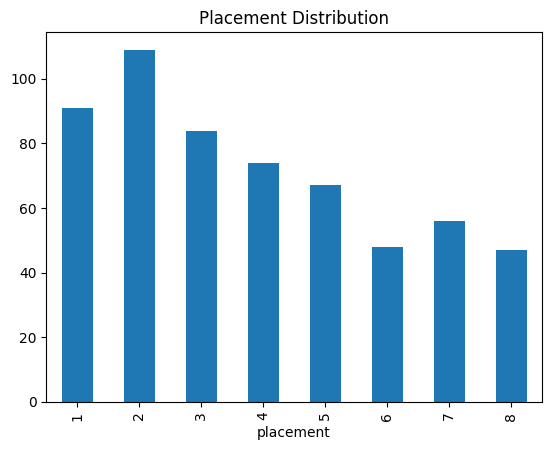

In [297]:
matches["placement"].value_counts().sort_index().plot(kind='bar', title="Placement Distribution")


In [298]:
# How many unique combinations of units?
unique_teams = matches["units"].apply(lambda lst: tuple(sorted([u.split()[0] for u in lst]))).nunique()
print("Unique team comps:", unique_teams, "out of", len(matches))

Unique team comps: 520 out of 576


In [299]:
nonzero_ratio = np.count_nonzero(X) / X.size
print(f"Non-zero ratio: {nonzero_ratio:.2%}")

Non-zero ratio: 4.03%


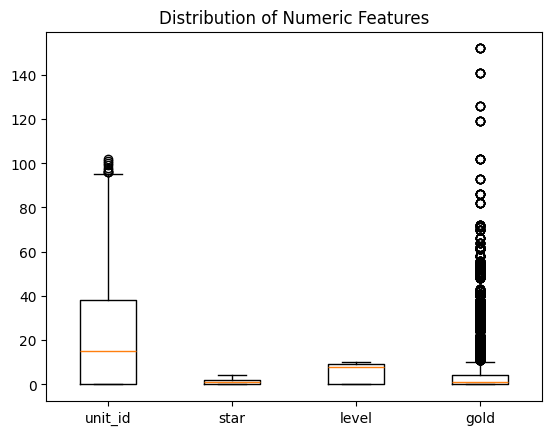

In [301]:
# Suppose your structure is:
# X.shape = (num_matches, 14, feature_dim)

# First 4 columns: unit_id, star, level, gold
# Next: unit_trait block
# Then: team_trait block

unit_trait_start = 4
unit_trait_end   = unit_trait_start + len(unit_trait2idx)
team_trait_end   = unit_trait_end + len(team_trait2idx)

# Flatten all trait blocks across all matches and units
trait_vectors = X[:, :, unit_trait_start:team_trait_end].reshape(-1, team_trait_end - unit_trait_start)


In [302]:
from sklearn.decomposition import PCA

pca_dim = 16  # or 12, 20, depending on variance you want to preserve
pca = PCA(n_components=pca_dim)
trait_vectors_reduced = pca.fit_transform(trait_vectors)  # shape: (num_matches * 14, pca_dim)


In [303]:
# Reshape reduced trait data back to (num_matches, 14, pca_dim)
trait_vectors_reshaped = trait_vectors_reduced.reshape(X.shape[0], X.shape[1], pca_dim)

# Remove old trait block and concatenate reduced block
X_dense = np.concatenate([
    X[:, :, :unit_trait_start],            # [unit_id, star, level, gold]
    trait_vectors_reshaped                 # [pca_dim] compressed trait features
], axis=-1)


In [304]:
nonzero_ratio = np.count_nonzero(X_dense) / X_dense.size
print(f"Non-zero ratio: {nonzero_ratio:.2%}")

Non-zero ratio: 92.32%


In [306]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ─── Step 1: Use placement as regression target ─────────────
y_reg = matches["placement"].astype(float)  # values from 1.0 to 8.0

# ─── Step 2: Train / Val / Test split ──────────────────────
X_trainval, X_test, y_trainval, y_test = train_test_split(X_dense, y_reg, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.15, random_state=42)

print("✅ Shapes:")
print("X_train:", X_train.shape)
print("X_val:  ", X_val.shape)
print("X_test: ", X_test.shape)

# ─── Step 3: Define RMSE metric ────────────────────────────
def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# ─── Step 4: Build CNN model for regression ────────────────
model = models.Sequential([
    layers.Input(shape=(X_dense.shape[1], X_dense.shape[2])),   # (14, feature_dim)
    layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)  # Predict one scalar: final placement
])

# ─── Step 5: Compile and train ─────────────────────────────
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[root_mean_squared_error]
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1
)


✅ Shapes:
X_train: (415, 14, 20)
X_val:   (74, 14, 20)
X_test:  (87, 14, 20)
Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 9.1882 - root_mean_squared_error: 2.9505 - val_loss: 11.9634 - val_root_mean_squared_error: 3.6892
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.3101 - root_mean_squared_error: 2.2742 - val_loss: 10.1177 - val_root_mean_squared_error: 3.3691
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7872 - root_mean_squared_error: 1.9234 - val_loss: 7.8670 - val_root_mean_squared_error: 2.9882
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5359 - root_mean_squared_error: 1.8731 - val_loss: 6.0115 - val_root_mean_squared_error: 2.6110
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7574 - root_mean_squared_error: 1.9248 - val_loss: 6.0463 - val_root_mean_squared_error: 2.6210
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0509 - root_mean_squared_error: 1.7390 - val_loss: 7.6865 - val_root_mean_square

In [307]:

# ─── Step 6: Evaluate on test set ──────────────────────────
test_loss, test_rmse = model.evaluate(X_test, y_test)
print(f"\n✅ Test RMSE: {test_rmse:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.0171 - root_mean_squared_error: 1.9924

✅ Test RMSE: 2.1161
